<a href="https://colab.research.google.com/github/AswinSamay9866/DataAnalysisProjects/blob/master/Matplotlibproj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd


In [ ]:
excel_file = '/content/drive/MyDrive/Project Data files/Assignment_Dataset (1).xlsx'
df = pd.read_excel(excel_file)
df.head(10)

,Date,GHI,PR
0,2019-07-01,3.256608,69.575676
1,2019-07-02,3.976767,79.314411
2,2019-07-03,2.811867,61.020006
3,2019-07-04,3.658408,83.262576
4,2019-07-05,5.590683,82.124440
5,2019-07-06,5.179733,82.764172
6,2019-07-07,4.120733,69.924507
7,2019-07-08,5.707992,84.789151
8,2019-07-09,6.469825,79.152393
9,2019-07-10,5.811892,69.085899


In [ ]:
print(df.dtypes)

Date         datetime64[ns]
GHI                 float64
PR                  float64
30-day MA           float64
index                 int64
target              float64
dtype: object


In [ ]:
df['30-day MA'] = df['PR'].rolling(window=30).mean()
df.head(10)

,Date,GHI,PR,30-day MA
0,2019-07-01,3.256608,69.575676,NaN
1,2019-07-02,3.976767,79.314411,NaN
2,2019-07-03,2.811867,61.020006,NaN
3,2019-07-04,3.658408,83.262576,NaN
4,2019-07-05,5.590683,82.124440,NaN
5,2019-07-06,5.179733,82.764172,NaN
6,2019-07-07,4.120733,69.924507,NaN
7,2019-07-08,5.707992,84.789151,NaN
8,2019-07-09,6.469825,79.152393,NaN
9,2019-07-10,5.811892,69.085899,NaN


In [ ]:
df['index'] = range(len(df))

In [ ]:
df['target'] = df['index'].apply(lambda x: 73.9 - (0.8 * (x // 365)))
df.tail()

,Date,GHI,PR,30-day MA,index,target
977,2022-03-20,4.226183,81.632738,71.181262,977,72.3
978,2022-03-21,3.431675,71.057353,70.789540,978,72.3
979,2022-03-22,3.580492,81.631509,71.231840,979,72.3
980,2022-03-23,4.997617,71.906149,71.249772,980,72.3
981,2022-03-24,5.125050,79.911798,71.855995,981,72.3


In [ ]:
count = len(df[df['PR'] > df['target']])
print(count)

485


In [ ]:
#Grouping according to GHI

df1 = df[df["GHI"] < 2]
df2 = df[(df['GHI'] > 2) & (df['GHI'] < 4)]
df3 = df[(df['GHI'] > 4) & (df['GHI'] < 6)]
df4 = df[df['GHI'] > 6]

In [139]:
#Finding different averages

average_7 = round(df['PR'].tail(7).mean(),2)
average_30 = round(df['PR'].tail(30).mean(),2)
average_60 = round(df['PR'].tail(60).mean(),2)
average_90 = round(df['PR'].tail(90).mean(),2)
average_365 = round(df['PR'].tail(365).mean(),2)
average_life = round(df['PR'].mean(),2)

textstr = 'Average PR last 7 - Days(%) :' + str(average_7) +'\nAverage PR last 30 - Days(%) :' + str(average_30) +'\nAverage PR last 60 - Days(%) :' + str(average_60) +'\nAverage PR last 90 - Days(%) :'+ str(average_90) + '\nAverage PR last 365 - Days(%) :'+ str(average_365) + '\nAverage PR lifetime(%)   :'+ str(average_life) 
print(textstr)

Average PR last 7 - Days(%) :73.8
Average PR last 30 - Days(%) :71.86
Average PR last 60 - Days(%) :73.01
Average PR last 90 - Days(%) :73.05
Average PR last 365 - Days(%) :72.88
Average PR lifetime(%)   :72.73


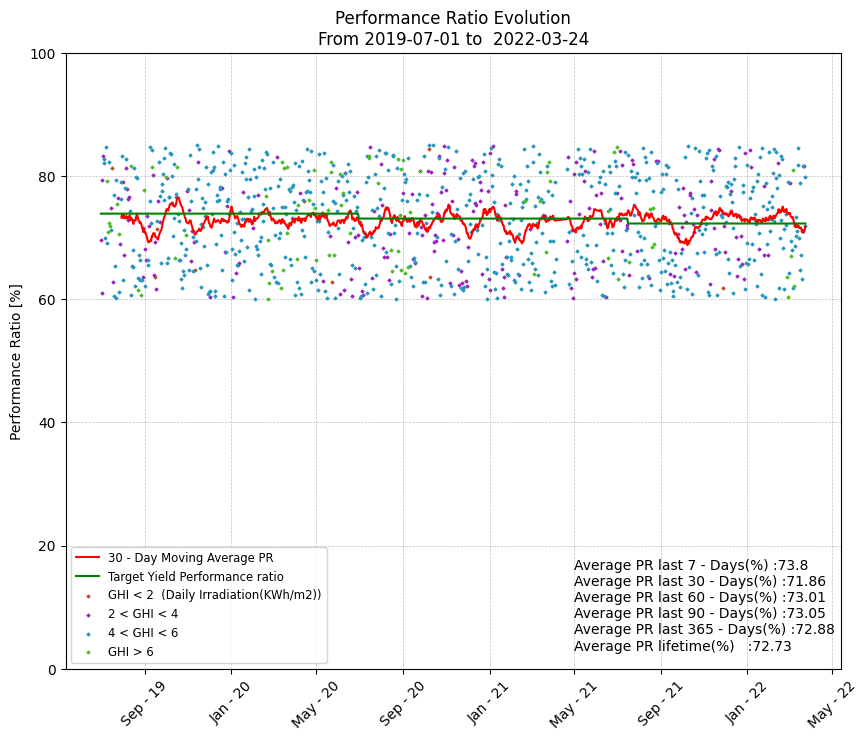

In [149]:
#Plotting
#Line Plots
fig , ax = plt.subplots()
fig.set_size_inches(10, 8)
#ScatterPlots
plt.plot(df.Date,df['30-day MA'],color = "red" , label = "30 - Day Moving Average PR" )
plt.plot(df.Date,df.target,color = "green", label = "Target Yield Performance ratio")
plt.scatter(df1.Date,df1.PR,marker ="D",s = 2 , c = '#be4d25', label = "GHI < 2  (Daily Irradiation(KWh/m2))")
plt.scatter(df2.Date,df2.PR,marker ="D",s = 2, c = '#9925be', label = "2 < GHI < 4")
plt.scatter(df3.Date,df3.PR,marker ="D",s = 2, c = '#2596be', label = "4 < GHI < 6")
plt.scatter(df4.Date,df4.PR,marker ="D",s = 2, c = '#49be25', label = "GHI > 6")
#Other Elements
plt.legend(fontsize='small')
ax.text(pd.to_datetime('2021-05-01'),3,textstr,fontsize=10)
plt.ylabel("Performance Ratio [%]")
plt.title("Performance Ratio Evolution\nFrom 2019-07-01 to  2022-03-24")
plt.ylim(0, 100)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
date_format = mdates.DateFormatter('%b - %y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)
plt.show()